In [1]:
import os,sys,math,cmath
import numpy as np
import tkinter as tk
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d #鼠标点击交互
from tkinter import ttk
from tkinter import messagebox as mbox
from tkinter import filedialog as fd
import pandas as pd

base_num=6
matD=np.empty((base_num,base_num),dtype=complex)
pi=np.pi #円周率
i_num=1j #虚数

kpoint_num=8 #高对称点总数
route_num=4 #k-path线路数
kpr1=3 #k-path route 1,2,3 包含的高对称点个数，-1可得每条线路的连线数
kpr2=3
kpr3=3
kpr4=2
kpr=np.array([kpr1,kpr2,kpr3,kpr4])

#每两个高对称点之间取点的个数
k_num=10

#2022/7:导入倒易向量的模长，以调整横坐标的长度。以此为基础整体调整程序内容，和ISAC03大致统一。

In [2]:
file_name="read_fai.xlsx"

df_1=pd.read_excel(file_name, sheet_name='c=-1')
df_2=pd.read_excel(file_name, sheet_name='c=0')
df_3=pd.read_excel(file_name, sheet_name='c=1')
df_4=pd.read_excel(file_name, sheet_name='lattice constant')
df_5=pd.read_excel(file_name, sheet_name='Γ')
df_6=pd.read_excel(file_name, sheet_name='k-path')
df_1=df_1.fillna(0)
df_2=df_2.fillna(0)
df_3=df_3.fillna(0)
df_5=df_5.fillna(0)
df_6=df_6.fillna(0)

In [3]:
matG=np.zeros((base_num,base_num),dtype=complex)

#c=-1
matK15=np.zeros((base_num,base_num),dtype=complex) #b-c
matK18=np.zeros((base_num,base_num),dtype=complex) #a-b-c
matK21=np.zeros((base_num,base_num),dtype=complex) #a-c
matK24=np.zeros((base_num,base_num),dtype=complex) #a+b-c

#c=0
matK13=np.zeros((base_num,base_num),dtype=complex) #中心
matK22=np.zeros((base_num,base_num),dtype=complex) #a軸上
matK16=np.zeros((base_num,base_num),dtype=complex) #b軸上
matK25=np.zeros((base_num,base_num),dtype=complex) #ab
matK19=np.zeros((base_num,base_num),dtype=complex) #a-b

#c=1
matK14=np.zeros((base_num,base_num),dtype=complex) #c軸上
matK17=np.zeros((base_num,base_num),dtype=complex) #bc
matK20=np.zeros((base_num,base_num),dtype=complex) #a-bc
matK23=np.zeros((base_num,base_num),dtype=complex) #ac
matK26=np.zeros((base_num,base_num),dtype=complex) #abc

In [4]:
matG=np.array(df_5.iloc[0:base_num,0:base_num],dtype=complex)

matK15=np.array(df_1.iloc[0:base_num,6:6+base_num],dtype=complex)
matK24=np.array(df_1.iloc[0:base_num,17:17+base_num],dtype=complex)
matK21=np.array(df_1.iloc[12:12+base_num,17:17+base_num],dtype=complex)
matK18=np.array(df_1.iloc[24:24+base_num,17:17+base_num],dtype=complex)

matK16=np.array(df_2.iloc[0:base_num,6:6+base_num],dtype=complex)
matK13=np.array(df_2.iloc[12:12+base_num,6:6+base_num],dtype=complex)
matK25=np.array(df_2.iloc[0:base_num,17:17+base_num],dtype=complex)
matK22=np.array(df_2.iloc[12:12+base_num,17:17+base_num],dtype=complex)
matK19=np.array(df_2.iloc[24:24+base_num,17:17+base_num],dtype=complex)

matK17=np.array(df_3.iloc[0:base_num,6:6+base_num],dtype=complex)
matK14=np.array(df_3.iloc[12:12+base_num,6:6+base_num],dtype=complex)
matK26=np.array(df_3.iloc[0:base_num,17:17+base_num],dtype=complex)
matK23=np.array(df_3.iloc[12:12+base_num,17:17+base_num],dtype=complex)
matK20=np.array(df_3.iloc[24:24+base_num,17:17+base_num],dtype=complex)

print(matK13)

for i in range(1,route_num+1):#k-path 坐标输入
    exec("matR"+str(i)+"=np.array(df_6.iloc[0:kpr"+str(i)+",7+5*(i-1):11+5*(i-1)],dtype=complex)")

[[ 3.44174018e+00+0.j  3.16155816e-01+0.j -4.50555675e-01+0.j
   2.25514052e-17+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [ 3.16155816e-01+0.j  3.53946164e+00+0.j -6.66233713e-01+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [-4.50555675e-01+0.j -6.66233713e-01+0.j  4.35333267e+00+0.j
   0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [ 2.25514052e-17+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   4.84351792e+00+0.j  1.99353903e+00+0.j  1.48138766e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   1.99353903e+00+0.j  5.90645444e+00+0.j  1.77492332e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j
   1.48138766e+00+0.j  1.77492332e+00+0.j  5.34380131e+00+0.j]]


In [5]:
list_eigen=[[[0] * (k_num+1) for i in range(max(kpr1,kpr2,kpr3,kpr4))] for j in range(route_num)] #固有値

In [6]:
#K0-12にK14-26の転置を代入
for i in range(0,13):
    exec("matK"+str(i)+"=matK"+str(26-i)+".T")


for r in range(0, route_num):
    exec("matR=matR"+str(r+1)+"")
    for p in range(0, kpr[r]-1):
        for k in range(0, k_num+1):
            a_i=(2*pi*(k/k_num*(matR[p+1,0]-matR[p,0])+matR[p,0]))*i_num
            b_i=(2*pi*(k/k_num*(matR[p+1,1]-matR[p,1])+matR[p,1]))*i_num
            c_i=(2*pi*(k/k_num*(matR[p+1,2]-matR[p,2])+matR[p,2]))*i_num
            
            matK=np.zeros((base_num,base_num),dtype=complex)
            
            
            for a in range(-1,2):
                for b in range(-1,2):
                    for c in range(-1,2):
                        n=(a+1)*9+(b+1)*3+c+1
                        exec("matK+=matK"+str(n)+"*cmath.exp(a*a_i+b*b_i+c*c_i)")
            
            if(r==0):
                if(p==0):
                    if(k==0):
                        #print(str(kx)+", "+str(ky)+", "+str(kz))
                        print(matK)
            
            exec("matD=np.dot(matG,matK)")
            exec("matK=np.dot(matD,matG)")

            l,P=np.linalg.eig(matK)

            l=np.sort(l,axis=0)
            v=np.transpose(P)

            list_eigen[r][p][k]=l.tolist()


[[ 3.05822260e+00-3.44259978e-33j -6.69246328e-01+3.69199266e-33j
   4.64960416e-02-2.64815367e-34j  3.46944695e-17+1.57649585e-17j
   0.00000000e+00-2.72918551e-17j -4.16333634e-17+7.34793406e-17j]
 [-6.69246328e-01+3.69199266e-33j  5.42985591e+00+1.46250305e-33j
  -9.87917361e-02+1.11342825e-34j -2.77555756e-17+1.02966833e-16j
   0.00000000e+00-7.26175474e-18j  1.11022302e-15+1.66497142e-16j]
 [ 4.64960416e-02-2.64815367e-34j -9.87917361e-02+1.11342825e-34j
   7.71220063e-01+3.76760045e-33j  1.98452366e-15-7.52353860e-17j
  -2.10942375e-15+5.89245411e-18j -2.77555756e-17+1.34655565e-17j]
 [ 1.38777878e-17-1.57649585e-17j -4.16333634e-17-1.02966833e-16j
   2.01227923e-15+7.52353860e-17j  2.36133803e+00+4.21297175e-33j
   1.30046297e+00-3.04537672e-33j  1.44699797e-01-6.68056949e-34j]
 [ 0.00000000e+00+2.72918551e-17j  0.00000000e+00+7.26175474e-18j
  -1.88737914e-15-5.89245411e-18j  1.30046297e+00-3.04537672e-33j
   4.74087377e+00-2.69630192e-33j  1.41999704e+00-3.65926689e-33j]
 [ 4.

In [7]:
y=[[[[0.0+0j]*(k_num+1) for k in range(base_num)] for i in range(max(kpr1,kpr2,kpr3,kpr4))] for j in range(route_num)]
for r in range(0,route_num):
    for p in range(0, kpr[r]-1):
        for value in range(0,base_num): #value 震动模式的序列
            for k in range(0,k_num+1):
                y[r][p][value][k]=list_eigen[r][p][k][value]

np_eigen=np.array(y,dtype=complex)

C:\Users\MProS220X_HJlab\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\MProS220X_HJlab\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\MProS220X_HJlab\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\MProS220X_HJlab\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\MProS220X_HJlab\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__

<Figure size 432x288 with 0 Axes>

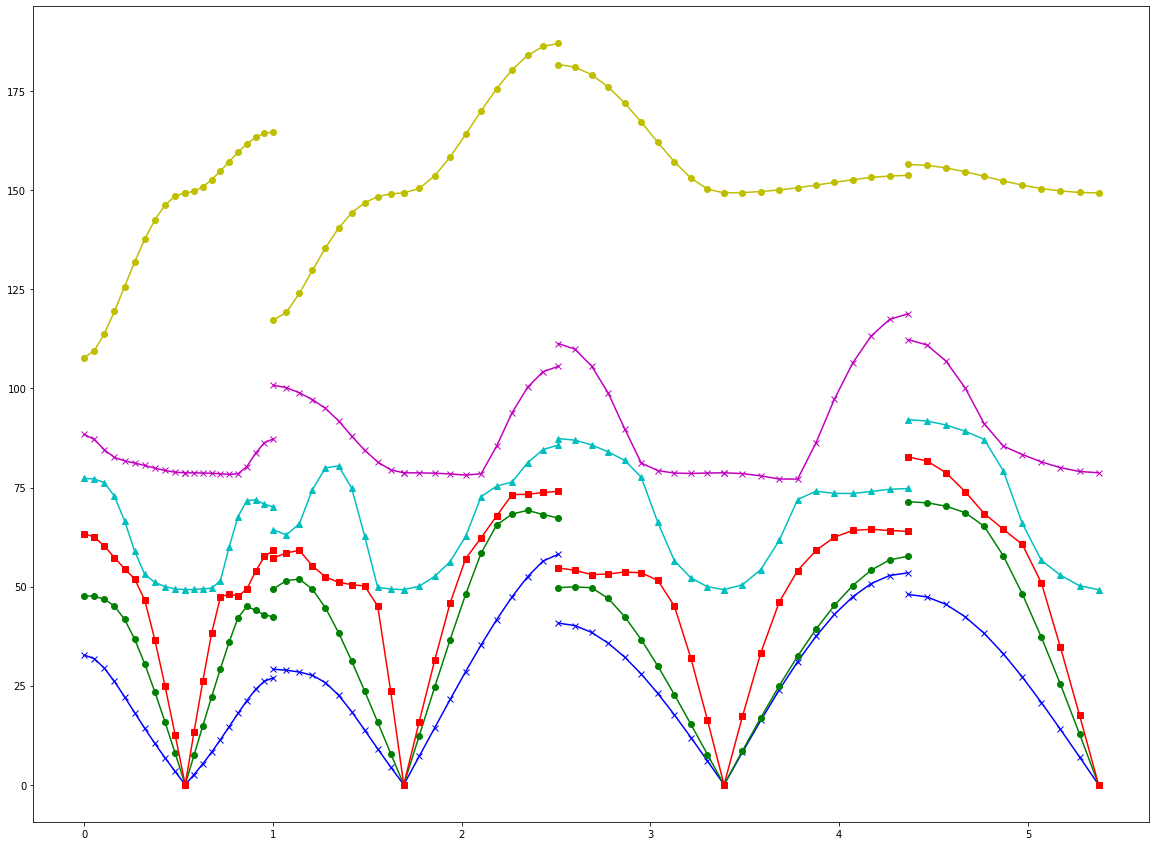

In [8]:
plt.clf()

plt.figure(figsize=(20,15))
x1=0
#计算各个高对称点之间的步长，以此给x赋值。
for r in range(0,route_num):
    exec("matR=matR"+str(r+1)+"")
    for p in range(0, kpr[r]-1):
        s=matR[p+1,3]
        x=np.array([x1,x1+0.1*s,x1+0.2*s,x1+0.3*s,x1+0.4*s,x1+0.5*s,x1+0.6*s,x1+0.7*s,x1+0.8*s,x1+0.9*s,x1+s])
        x1=x1+s
        
        plt.plot(x,np.sqrt(np_eigen[r][p][0]/0.000059),color='b',marker='x')
        plt.plot(x,np.sqrt(np_eigen[r][p][1]/0.000059),'g-o')
        plt.plot(x,np.sqrt(np_eigen[r][p][2]/0.000059),'r-s')
        plt.plot(x,np.sqrt(np_eigen[r][p][3]/0.000059),'c-^')
        plt.plot(x,np.sqrt(np_eigen[r][p][4]/0.000059),'m-x')
        plt.plot(x,np.sqrt(np_eigen[r][p][5]/0.000059),'y-o')
        #plt.plot(x,np.sqrt(np_eigen[r][p][6]/0.000059),'b-s') 根据计算base数需要进行调整
        #plt.plot(x,np.sqrt(np_eigen[r][p][7]/0.000059),'g-^')
        #plt.plot(x,np.sqrt(np_eigen[r][p][8]/0.000059),'r-x')
        #plt.plot(x,np.sqrt(np_eigen[r][p][9]/0.000059),'c-o')
        #plt.plot(x,np.sqrt(np_eigen[r][p][10]/0.000059),'m-s')
        #plt.plot(x,np.sqrt(np_eigen[r][p][11]/0.000059),'y-^')

plt.show()

In [33]:
s=0.02
b1=0.933074978328598
b2=1.07162048621218
b3=1.75386677814264

list_eigenb1b2=[[0] * (54) for i in range(48)] 

for m1 in range(0,48):#取值范围由高对称点中对应坐标的极值决定（系数乘以模长），下方的判断语句由解决不等式问题得到
    n1=m1-24
    for m2 in range(0,54):
        n2=m2-27
        a_i=(2*pi*n1*s/b1)*i_num
        b_i=(2*pi*n2*s/b2)*i_num
        matK=np.zeros((base_num,base_num),dtype=complex)
        for a in range(-1,2):
            for b in range(-1,2):
                n=(a+1)*9+(b+1)*3+1
                exec("matK+=matK"+str(n)+"*cmath.exp(a*a_i+b*b_i)")
        exec("matD=np.dot(matG,matK)")
        exec("matK=np.dot(matD,matG)")
            
        l,P=np.linalg.eig(matK)

        l=np.sort(l,axis=0)
        v=np.transpose(P)
                
        list_eigenb1b2[m1][m2]=l.tolist()

z=[[[0.0+0j]*base_num for i in range(54)] for j in range(48)]
for m1 in range(0,48):
    for m2 in range(0, 54):
        for value in range(0,6):
            #if -0.459233260840324-m3*s*0.608899886015249<=m*s<=0.459233260840324-m3*s*0.608899886015249 and m3*s<=0.534182309345421-m*s*0.608899886015249 and m*s*-0.267939427137069+m3*s*0.509110458330674<=0.39500449717483:
            z[m1][m2][value]=list_eigenb1b2[m1][m2][value]

np_eigenb1b2=np.array(z,dtype=np.complex) 

#把数组转化为数列，以特定
N1=[token for st in z for token in st]
N2=[token for st in N1 for token in st]#6*54*48
N3=np.array(N2)
print(N1[0])
print(N2[0])

[(0.15661182511818328-4.429420701645452e-19j), (0.16865966758374537+1.1058746228864274e-17j), (0.24839806912392098+1.5525661924711633e-17j), (0.3109738080406691+1.5947621294156292e-19j), (0.625081314139829+1.9135408776045436e-19j), (1.0931193168571318+1.0732971901060877e-18j)]
(0.15661182511818328-4.429420701645452e-19j)


C:\Users\MPROS2~1\AppData\Local\Temp/ipykernel_16344/2487100302.py:36: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np_eigenb1b2=np.array(z,dtype=np.complex)


(36, 30)
(36, 30)
(36, 30)


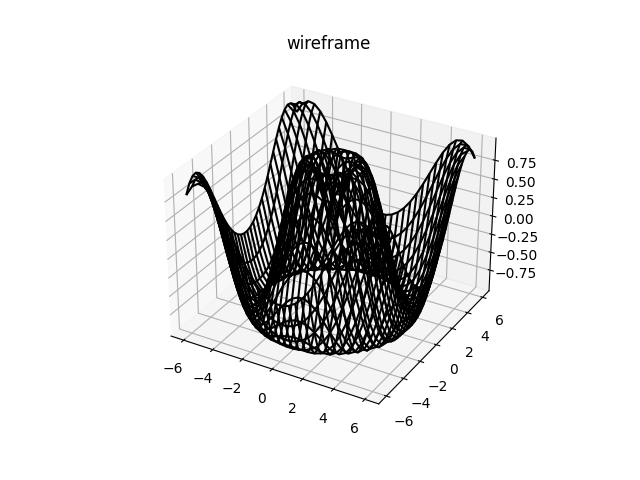

In [1]:
%matplotlib widget

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
#要绘制函数图像
def f(x, y):
   return np.sin(np.sqrt(x ** 2 + y ** 2))
#准备x,y数据
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 36)
#生成x、y网格化数据
X, Y = np.meshgrid(x, y)
#准备z值
Z = f(X, Y)
print(X.shape) #(37,37)
print(Y.shape) #(37,37)
print(Z.shape)
#绘制图像
fig = plt.figure()
ax = plt.axes(projection='3d')
#调用绘制线框图的函数plot_wireframe()
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe')

def on_click(event):
    ax.view_init(elev=event.ydata,azim=event.xdata)
    fig.canvas.draw_idle()
    fig.canvas.flush_events()
    
fig.canvas.mpl_connect('button_press_event',on_click)

plt.show()

(53, 47)
(53, 47)
(53, 47)
(54, 48)
(54, 48)
(54, 48)
(53, 47)
(53, 47)
(53, 47)
(53, 47)
(54, 48)
(54, 48)
(54, 48)
(53, 47)
(53, 47)
(53, 47)
(53, 47)
(54, 48)
(54, 48)
(54, 48)


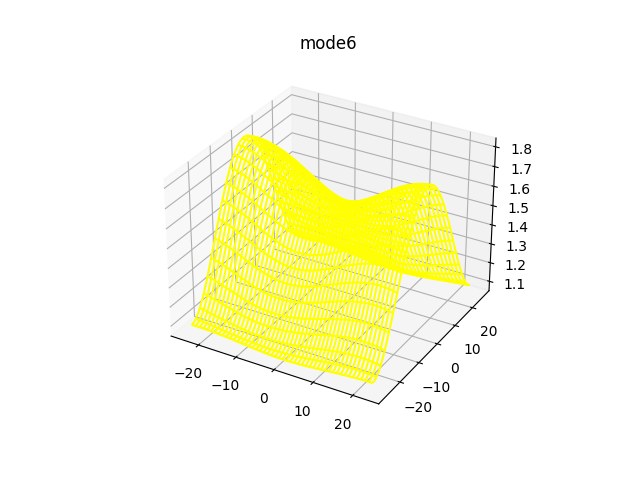

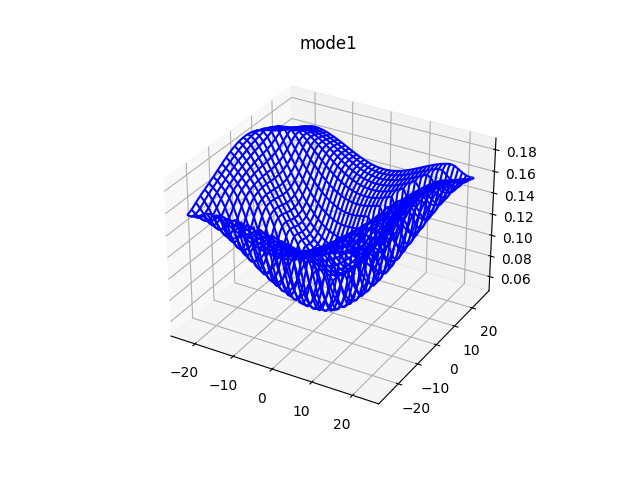

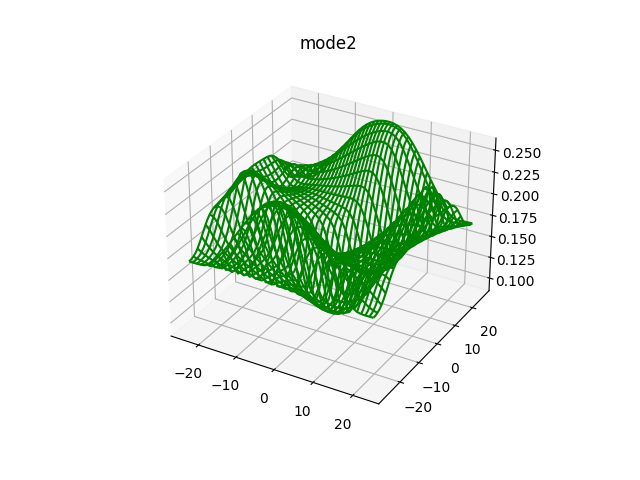

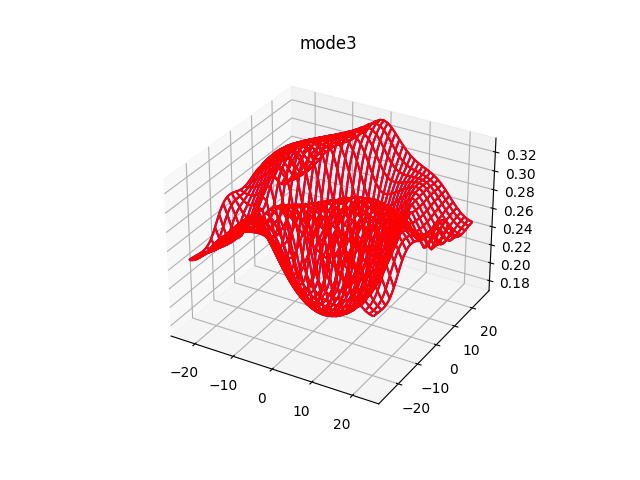

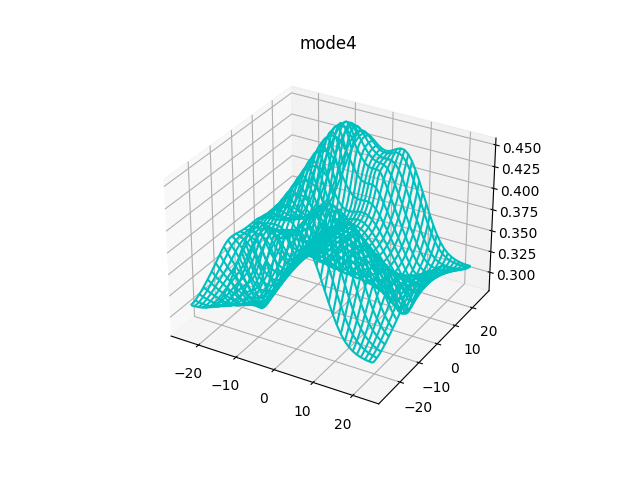

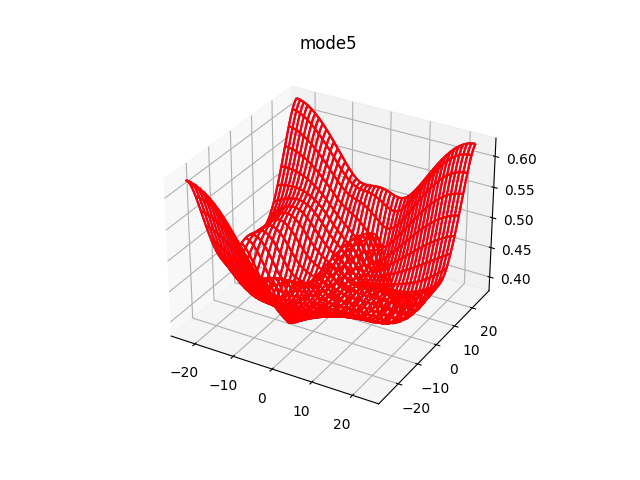

In [37]:
%matplotlib widget

from mpl_toolkits import mplot3d

#要绘制函数图像
def f(x, y):
    return N3[(x+24)*54*6+(y+27)*6+0]
#准备x,y数据
x = [-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
y = [-26,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
#生成x、y网格化数据
X, Y = np.meshgrid(x, y)
#准备z值
Z = f(X, Y)
#绘制图像
print(X.shape) #(37,37)
print(Y.shape) #(37,37)
print(Z.shape)
fig = plt.figure()
ax = plt.axes(projection='3d')
#调用绘制线框图的函数plot_wireframe()
ax.plot_wireframe(X, Y, Z, color='blue')

ax.set_title('mode1')

def on_click(event):
    ax.view_init(elev=event.ydata,azim=event.xdata)
    fig.canvas.draw_idle()
    fig.canvas.flush_events()
    
fig.canvas.mpl_connect('button_press_event',on_click)

def f(x, y):
    return N3[(x+24)*54*6+(y+27)*6+1]
#准备x,y数据
x = [-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
y = [-27,-26,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
#生成x、y网格化数据
X, Y = np.meshgrid(x, y)
#准备z值
Z = f(X, Y)
#绘制图像
print(X.shape) #(37,37)
print(Y.shape) #(37,37)
print(Z.shape)
fig = plt.figure()
ax = plt.axes(projection='3d')

#调用绘制线框图的函数plot_wireframe()
ax.plot_wireframe(X, Y, Z, color='green')
ax.set_title('mode2')

def on_click(event):
    ax.view_init(elev=event.ydata,azim=event.xdata)
    fig.canvas.draw_idle()
    fig.canvas.flush_events()
    
fig.canvas.mpl_connect('button_press_event',on_click)

def f(x, y):
    return N3[(x+24)*54*6+(y+27)*6+2]
#准备x,y数据
x = [-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
y = [-26,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
#生成x、y网格化数据
X, Y = np.meshgrid(x, y)
#准备z值
Z = f(X, Y)
Zt= f(-X,-Y)
#绘制图像
print(X.shape) #(37,37)
print(Y.shape) #(37,37)
print(Z.shape)
print(Zt.shape)
fig = plt.figure()
ax = plt.axes(projection='3d')
#调用绘制线框图的函数plot_wireframe()
ax.plot_wireframe(X, Y, Z, color='red')
ax.plot_wireframe(X, Y, Zt, color='blue')
ax.set_title('mode3')

def on_click(event):
    ax.view_init(elev=event.ydata,azim=event.xdata)
    fig.canvas.draw_idle()
    fig.canvas.flush_events()
    
fig.canvas.mpl_connect('button_press_event',on_click)

def f(x, y):
    return N3[(x+24)*54*6+(y+27)*6+3]
#准备x,y数据
x = [-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
y = [-27,-26,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
#生成x、y网格化数据
X, Y = np.meshgrid(x, y)
#准备z值
Z = f(X, Y)
#绘制图像
print(X.shape) #(37,37)
print(Y.shape) #(37,37)
print(Z.shape)
fig = plt.figure()
ax = plt.axes(projection='3d')

#调用绘制线框图的函数plot_wireframe()
ax.plot_wireframe(X, Y, Z, color='c')
ax.set_title('mode4')

def on_click(event):
    ax.view_init(elev=event.ydata,azim=event.xdata)
    fig.canvas.draw_idle()
    fig.canvas.flush_events()
    
fig.canvas.mpl_connect('button_press_event',on_click)

def f(x, y):
    return N3[(x+24)*54*6+(y+27)*6+4]
#准备x,y数据
x = [-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
y = [-26,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
#生成x、y网格化数据
X, Y = np.meshgrid(x, y)
#准备z值
Z = f(X, Y)
Zt = f(-X, -Y)
#绘制图像
print(X.shape) #(37,37)
print(Y.shape) #(37,37)
print(Z.shape)
print(Zt.shape)
fig = plt.figure()
ax = plt.axes(projection='3d')
#调用绘制线框图的函数plot_wireframe()
ax.plot_wireframe(X, Y, Z, color='purple')
ax.plot_wireframe(X, Y, Zt, color='red')
ax.set_title('mode5')

def on_click(event):
    ax.view_init(elev=event.ydata,azim=event.xdata)
    fig.canvas.draw_idle()
    fig.canvas.flush_events()
    
fig.canvas.mpl_connect('button_press_event',on_click)

def f(x, y):
    return N3[(x+24)*54*6+(y+27)*6+5]
#准备x,y数据
x = [-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
y = [-27,-26,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
#生成x、y网格化数据
X, Y = np.meshgrid(x, y)
#准备z值
Z = f(X, Y)
#绘制图像
print(X.shape) #(37,37)
print(Y.shape) #(37,37)
print(Z.shape)
fig = plt.figure()
ax = plt.axes(projection='3d')
#调用绘制线框图的函数plot_wireframe()
ax.plot_wireframe(X, Y, Z, color='yellow')
ax.set_title('mode6')

def on_click(event):
    ax.view_init(elev=event.ydata,azim=event.xdata)
    fig.canvas.draw_idle()
    fig.canvas.flush_events()
    
fig.canvas.mpl_connect('button_press_event',on_click)

plt.show()

In [36]:
#DOS计算模块：由4分之一FBZ的统计得到，整体应该分为计算部分和能量分拣部分。
#计算区间的判断为各个方向（逆向量）的极值（循环范围）和数个不等式（判断语句）组成。

s=0.01
b1=0.933074978328598
b2=1.07162048621218
b3=1.75386677814264

list_eigenfbz=[[[0] * (87) for i in range(107)] for j in range(46+46+1)]

for m1 in range(0,46+46+1):#取值范围由高对称点中对应坐标的极值决定（系数乘以模长），下方的判断语句由解决不等式问题得到
    m=m1-47
    for m2 in range(0,107):
        M=m2-54
        for m3 in range(0,87):
                a_i=(2*pi*m*s/b1)*i_num
                b_i=(2*pi*M*s/b2)*i_num
                c_i=(2*pi*m3*s/b3)*i_num
                matK=np.zeros((base_num,base_num),dtype=complex)

                for a in range(-1,2):
                    for b in range(-1,2):
                        for c in range(-1,2):
                            n=(a+1)*9+(b+1)*3+c+1
                            exec("matK+=matK"+str(n)+"*cmath.exp(a*a_i+b*b_i+c*c_i)")

                exec("matD=np.dot(matG,matK)")
                exec("matK=np.dot(matD,matG)")

                l,P=np.linalg.eig(matK)

                l=np.sort(l,axis=0)
                v=np.transpose(P)

                list_eigenfbz[m1][m2][m3]=l.tolist()

z=[[[[0.0+0j]*(base_num) for i in range(87)] for j in range(107)] for k in range(46+47)]
for m1 in range(0,93):
    m=m1-47
    for m2 in range(0, 107):
        M=m2-54
        for m3 in range(0,87):
            for value in range(0,6):
                #if -0.459233260840324-m3*s*0.608899886015249<=m*s<=0.459233260840324-m3*s*0.608899886015249 and m3*s<=0.534182309345421-m*s*0.608899886015249 and m*s*-0.267939427137069+m3*s*0.509110458330674<=0.39500449717483:
                    z[m1][m2][m3][value]=list_eigenfbz[m1][m2][m3][value]

np_eigenfbz=np.array(z,dtype=np.complex)                

KeyboardInterrupt: 

In [ ]:
plt.clf()
plt.figure(figsize=(5,15))
N=0 #计算的点的总数
se=1 #step_length_of_energy
w=[0]*185
for x in range(0,185):#范围由声子谱范围决定
    n=0
    for m1 in range(-47,46):#取值范围由高对称点中对应坐标的极值决定（系数乘以模长），下方的判断语句由解决不等式问题得到
        m=m1+47
        for m2 in range(-54,53):
            M=m2+54
            for m3 in range(0,87):
                for value in range(0,base_num):
                    #（先无判断试一次）if -0.459233260840324-m3*s*0.608899886015249<=m1*s<=0.459233260840324-m3*s*0.608899886015249 and m3*s<=0.534182309345421-m1*s*0.608899886015249 and m1*s*-0.267939427137069+m3*s*0.509110458330674<=0.39500449717483:
                        if x<=np.real(np.sqrt(np_eigenfbz[m][M][m3][value]/0.000059))<x+1:
                            n=n+1
    n=n*2
    N=N+n
    w[x]=n
for x in range(0,185):
    plt.barh(x,w[x]*base_num/(N*se),color='c')

plt.show()
                         

49.1315986748873


<Figure size 432x288 with 0 Axes>

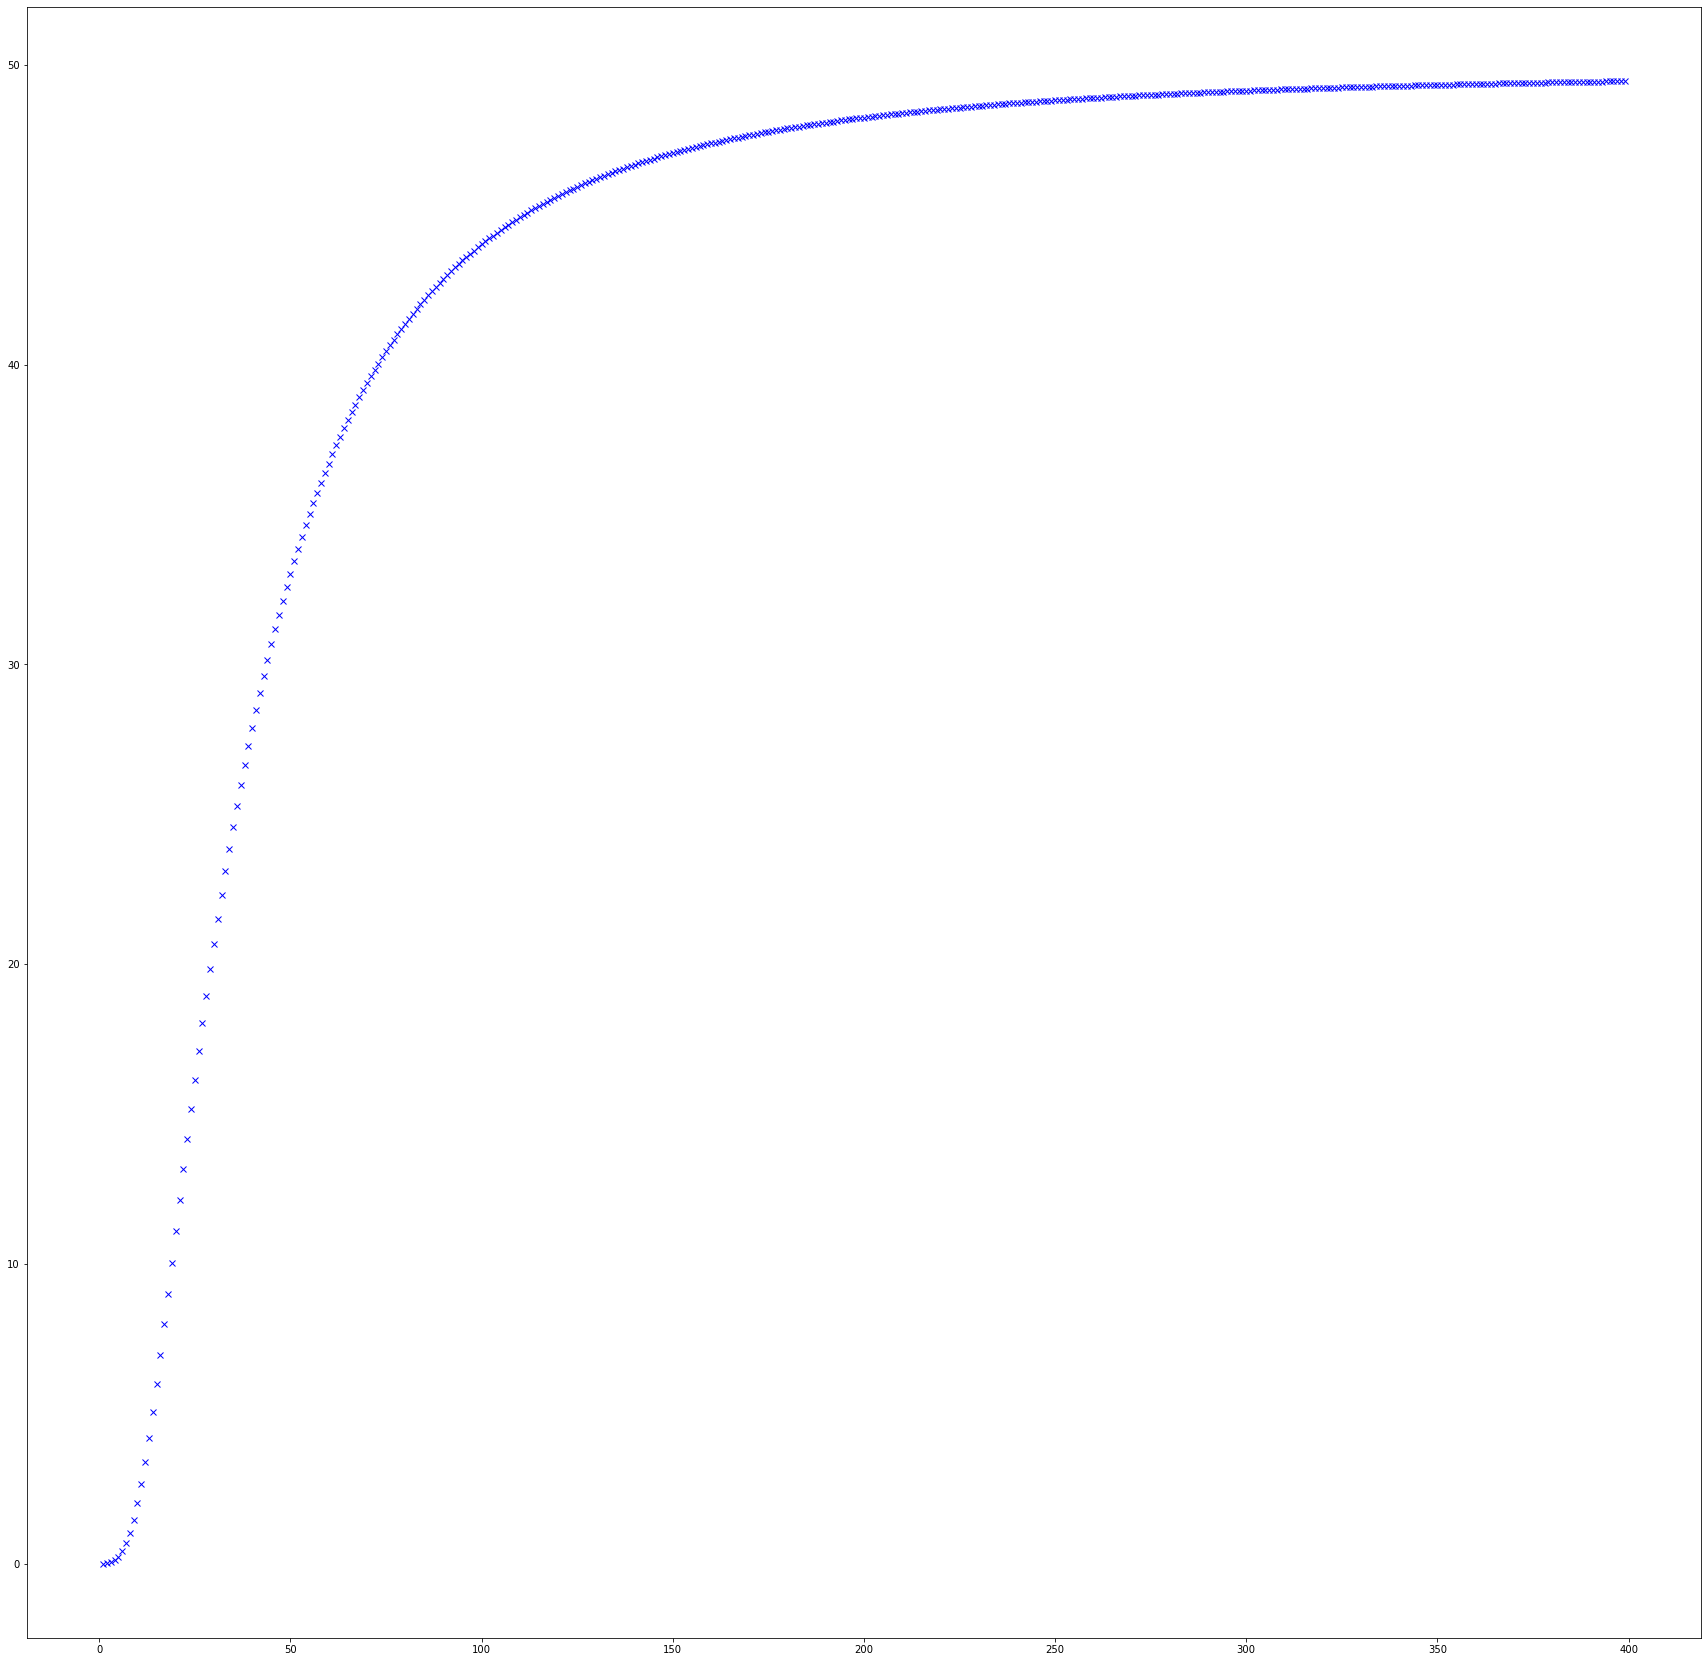

In [14]:
#热容计算模块 C=kB积分dwDw*[hw/kbT]^2e^hw/kbT/(e^hw/kbT-1)
kB=1.380649*10**(-23) #玻尔兹曼常数
h=6.62607015*10**(-34) #普朗克常量
L=6.022*10**23 #阿伏伽德罗常数
V=29979245800
e=math.e
plt.clf()
plt.figure(figsize=(30,30))
for T in range(1,400):
    Cv=0
    for x in range(0,185):
        K=h*(x+0.5)*V/(kB*T)
        C=L*kB*w[x]*base_num/N*K*K*e**(-K)/((e**(-K)-1)**2)
        Cv=Cv+C
    if (T==298):
        print(Cv)
    plt.plot(T,Cv,color='b',marker='x')
    
plt.show()

49.1315986748873


<Figure size 432x288 with 0 Axes>

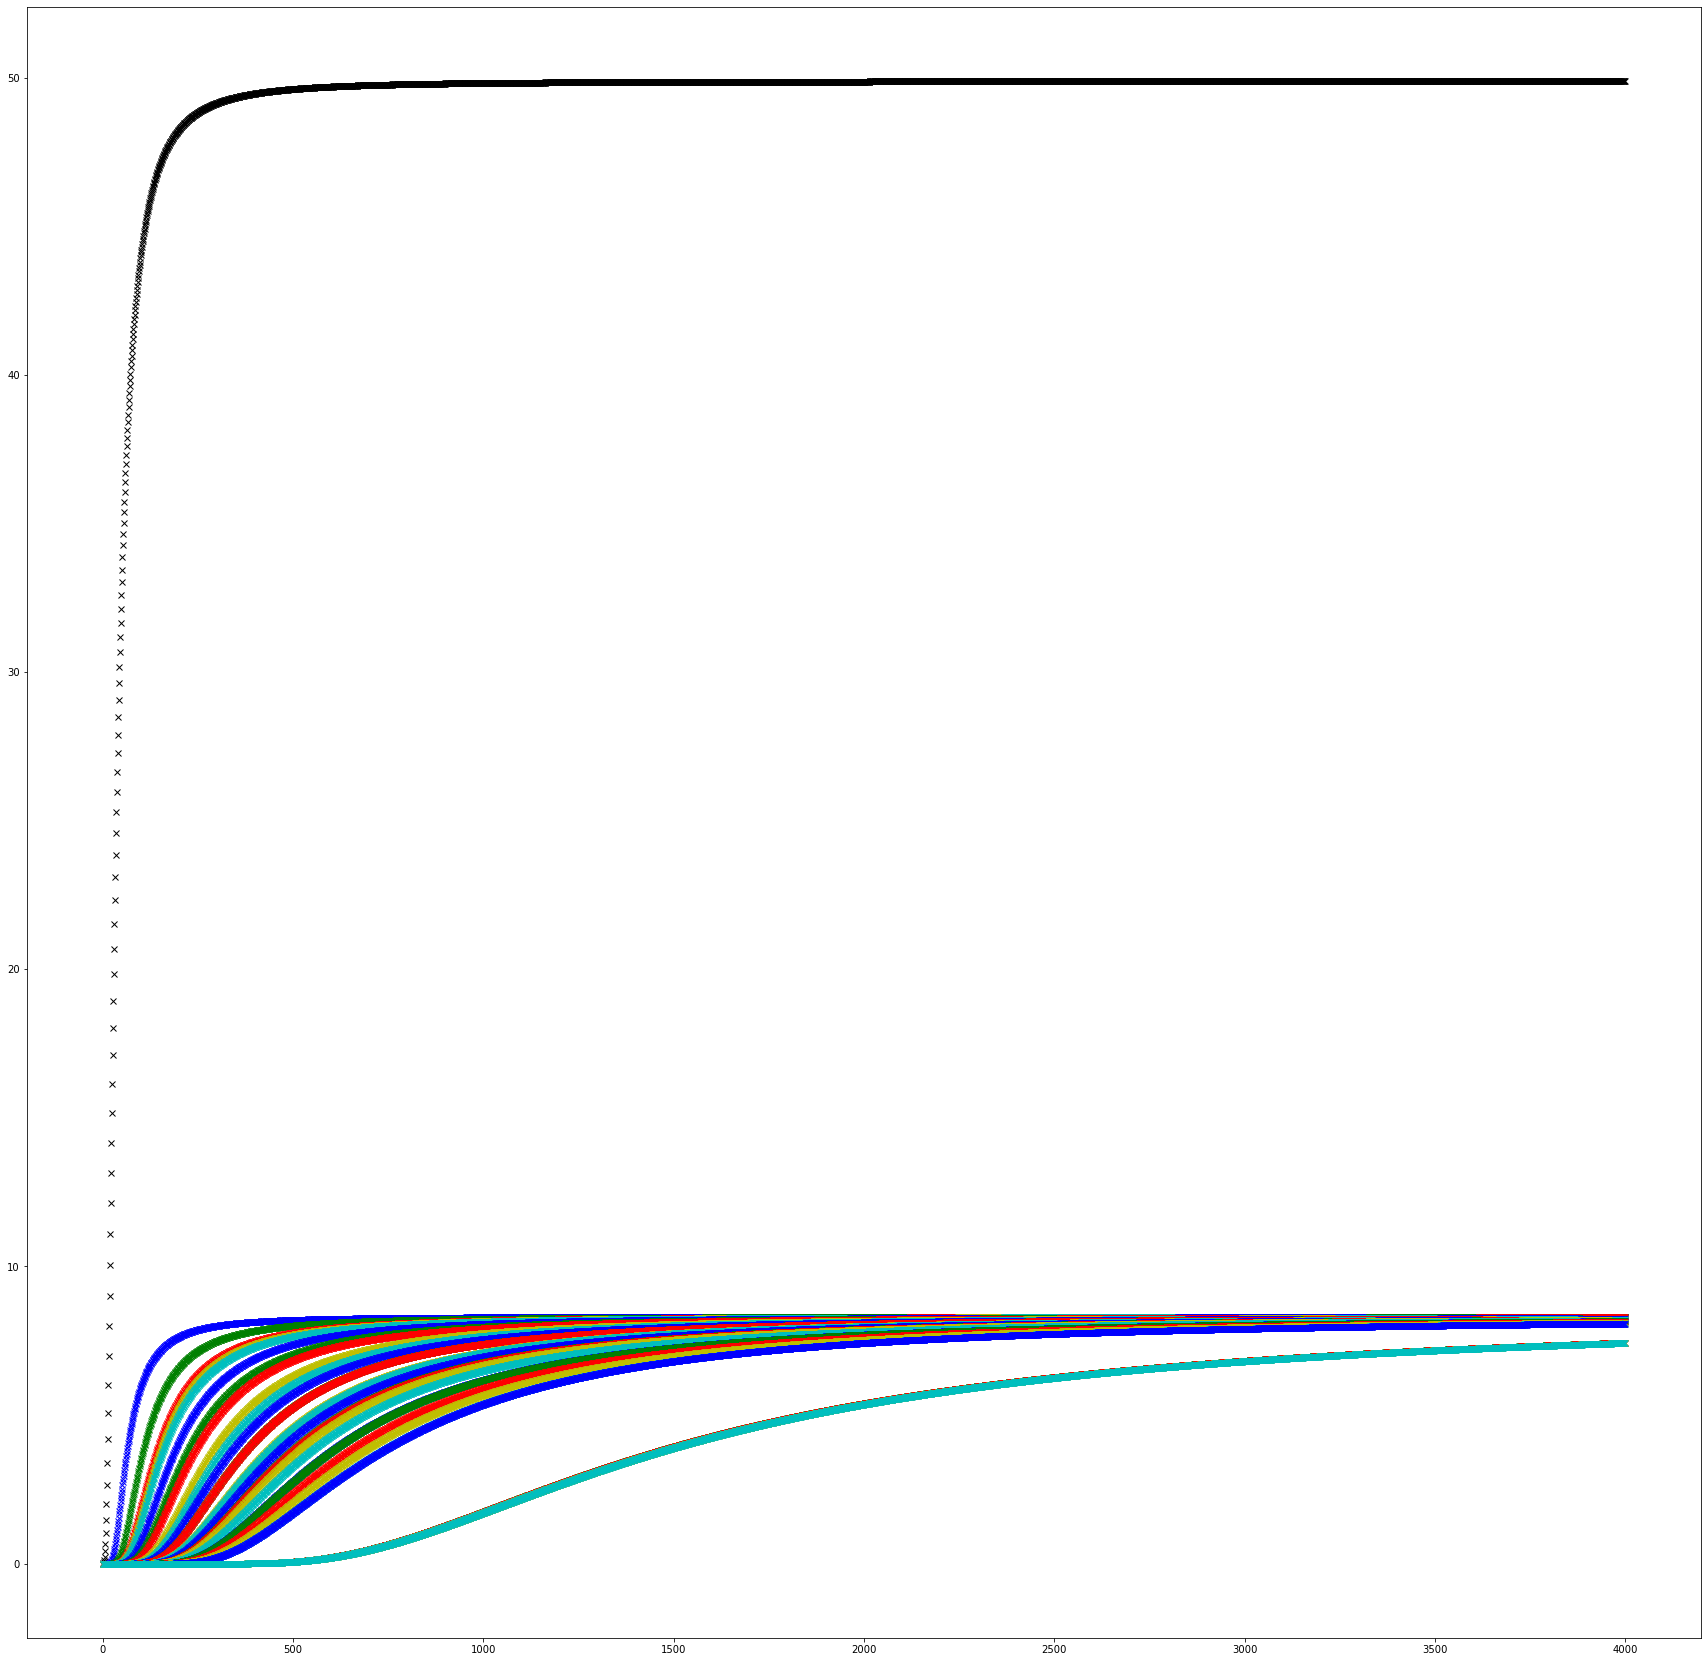

In [15]:
#hf单独计算：141.815 	235.1949	 315.1233	333.9341 351.7837	 419.7602   494.2891	 537.3269	639.4809	 693.9628	751.2563	 831.2246 833.1187	 957.6625	966.6672	 1023.4366	1100.8029	1108.4381	1138.8111 1213.4714	1331.981	 1336.5899	1435.1579	1520.2605	1627.2272	1630.5848 3241.0503	3244.9838	3259.0776	3260.7954
kB=1.380649*10**(-23) #玻尔兹曼常数
h=6.62607015*10**(-34) #普朗克常量
L=6.022*10**23 #阿伏伽德罗常数
V=29979245800
plt.clf()
plt.figure(figsize=(30,30))
for T in range(1,4000):
    Cv=0
    for x in range(0,185):
        K=h*(x+0.5)*V/(kB*T)
        C=L*kB*w[x]*base_num/N*K*K*e**(-K)/((e**(-K)-1)**2)
        Cv=Cv+C
    if (T==298):
        print(Cv)
    plt.plot(T,Cv,color='black',marker='x')
    
for T in range(1,4000):
    K=h*141.815*V/(kB*T)
    C=L*kB*K*K*e**(K)/((e**(K)-1)**2)
    plt.plot(T,C,color='b',marker='x')

for T in range(1,4000):
    K=h*235.1949*V/(kB*T)
    C=L*kB*K*K*e**(K)/((e**(K)-1)**2)
    plt.plot(T,C,color='g',marker='x')
    
for T in range(1,4000):
    K=h*315.1233*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    plt.plot(T,C,color='r',marker='x')

for T in range(1,4000):
    K=h*333.9341*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    plt.plot(T,C,color='y',marker='x')

for T in range(1,4000):
    K=h*351.7837*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    plt.plot(T,C,color='c',marker='x')

for T in range(1,4000):
    K=h*419.7602*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    plt.plot(T,C,color='b',marker='x')

for T in range(1,4000):
    K=h*494.2891*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    plt.plot(T,C,color='g',marker='x')

for T in range(1,4000):
    K=h*537.3269*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    plt.plot(T,C,color='r',marker='x')
    
for T in range(1,4000):
    K=h*639.4808*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    plt.plot(T,C,color='y',marker='x')
    
for T in range(1,4000):
    K=h*693.9628*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    plt.plot(T,C,color='c',marker='x')
    
for T in range(1,4000):
    K=h*751.2563*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    plt.plot(T,C,color='b',marker='x')

for T in range(1,4000):
    K=h*831.2246*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    plt.plot(T,C,color='g',marker='x')

for T in range(1,4000):
    K=h*833.1187*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    plt.plot(T,C,color='r',marker='x')
    
for T in range(1,4000):
    K=h*957.6625*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    plt.plot(T,C,color='y',marker='x')
    
for T in range(1,4000):
    K=h*966.6672*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    plt.plot(T,C,color='c',marker='x')
    
for T in range(1,4000):
    K=h*1023.4366*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    plt.plot(T,C,color='b',marker='x')

for T in range(1,4000):
    K=h*1100.8029*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    plt.plot(T,C,color='g',marker='x')

for T in range(1,4000):
    K=h*1108.4381*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    plt.plot(T,C,color='r',marker='x')
    
for T in range(1,4000):
    K=h*1138.8111*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    plt.plot(T,C,color='y',marker='x')
    
for T in range(1,4000):
    K=h*1213.4714*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    plt.plot(T,C,color='c',marker='x')

for T in range(1,4000):
    K=h*1331.981*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    plt.plot(T,C,color='b',marker='x')
    
for T in range(1,4000):
    K=h*1336.5899*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    plt.plot(T,C,color='g',marker='x')

for T in range(1,4000):
    K=h*1435.1579*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    plt.plot(T,C,color='r',marker='x')
    
for T in range(1,4000):
    K=h*1520.2605*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    plt.plot(T,C,color='y',marker='x')
    
for T in range(1,4000):
    K=h*1627.2272*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    plt.plot(T,C,color='c',marker='x')
    
for T in range(1,4000):
    K=h*1630.5848*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    plt.plot(T,C,color='b',marker='x')
    
for T in range(1,4000):
    K=h*3241.0503*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    plt.plot(T,C,color='g',marker='x')

for T in range(1,4000):
    K=h*3244.9838*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    plt.plot(T,C,color='r',marker='x')
    
for T in range(1,4000):
    K=h*3259.0776*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    plt.plot(T,C,color='y',marker='x')
    
for T in range(1,4000):
    K=h*3260.7954*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    plt.plot(T,C,color='c',marker='x')
plt.show()

49.1315986748873


<Figure size 432x288 with 0 Axes>

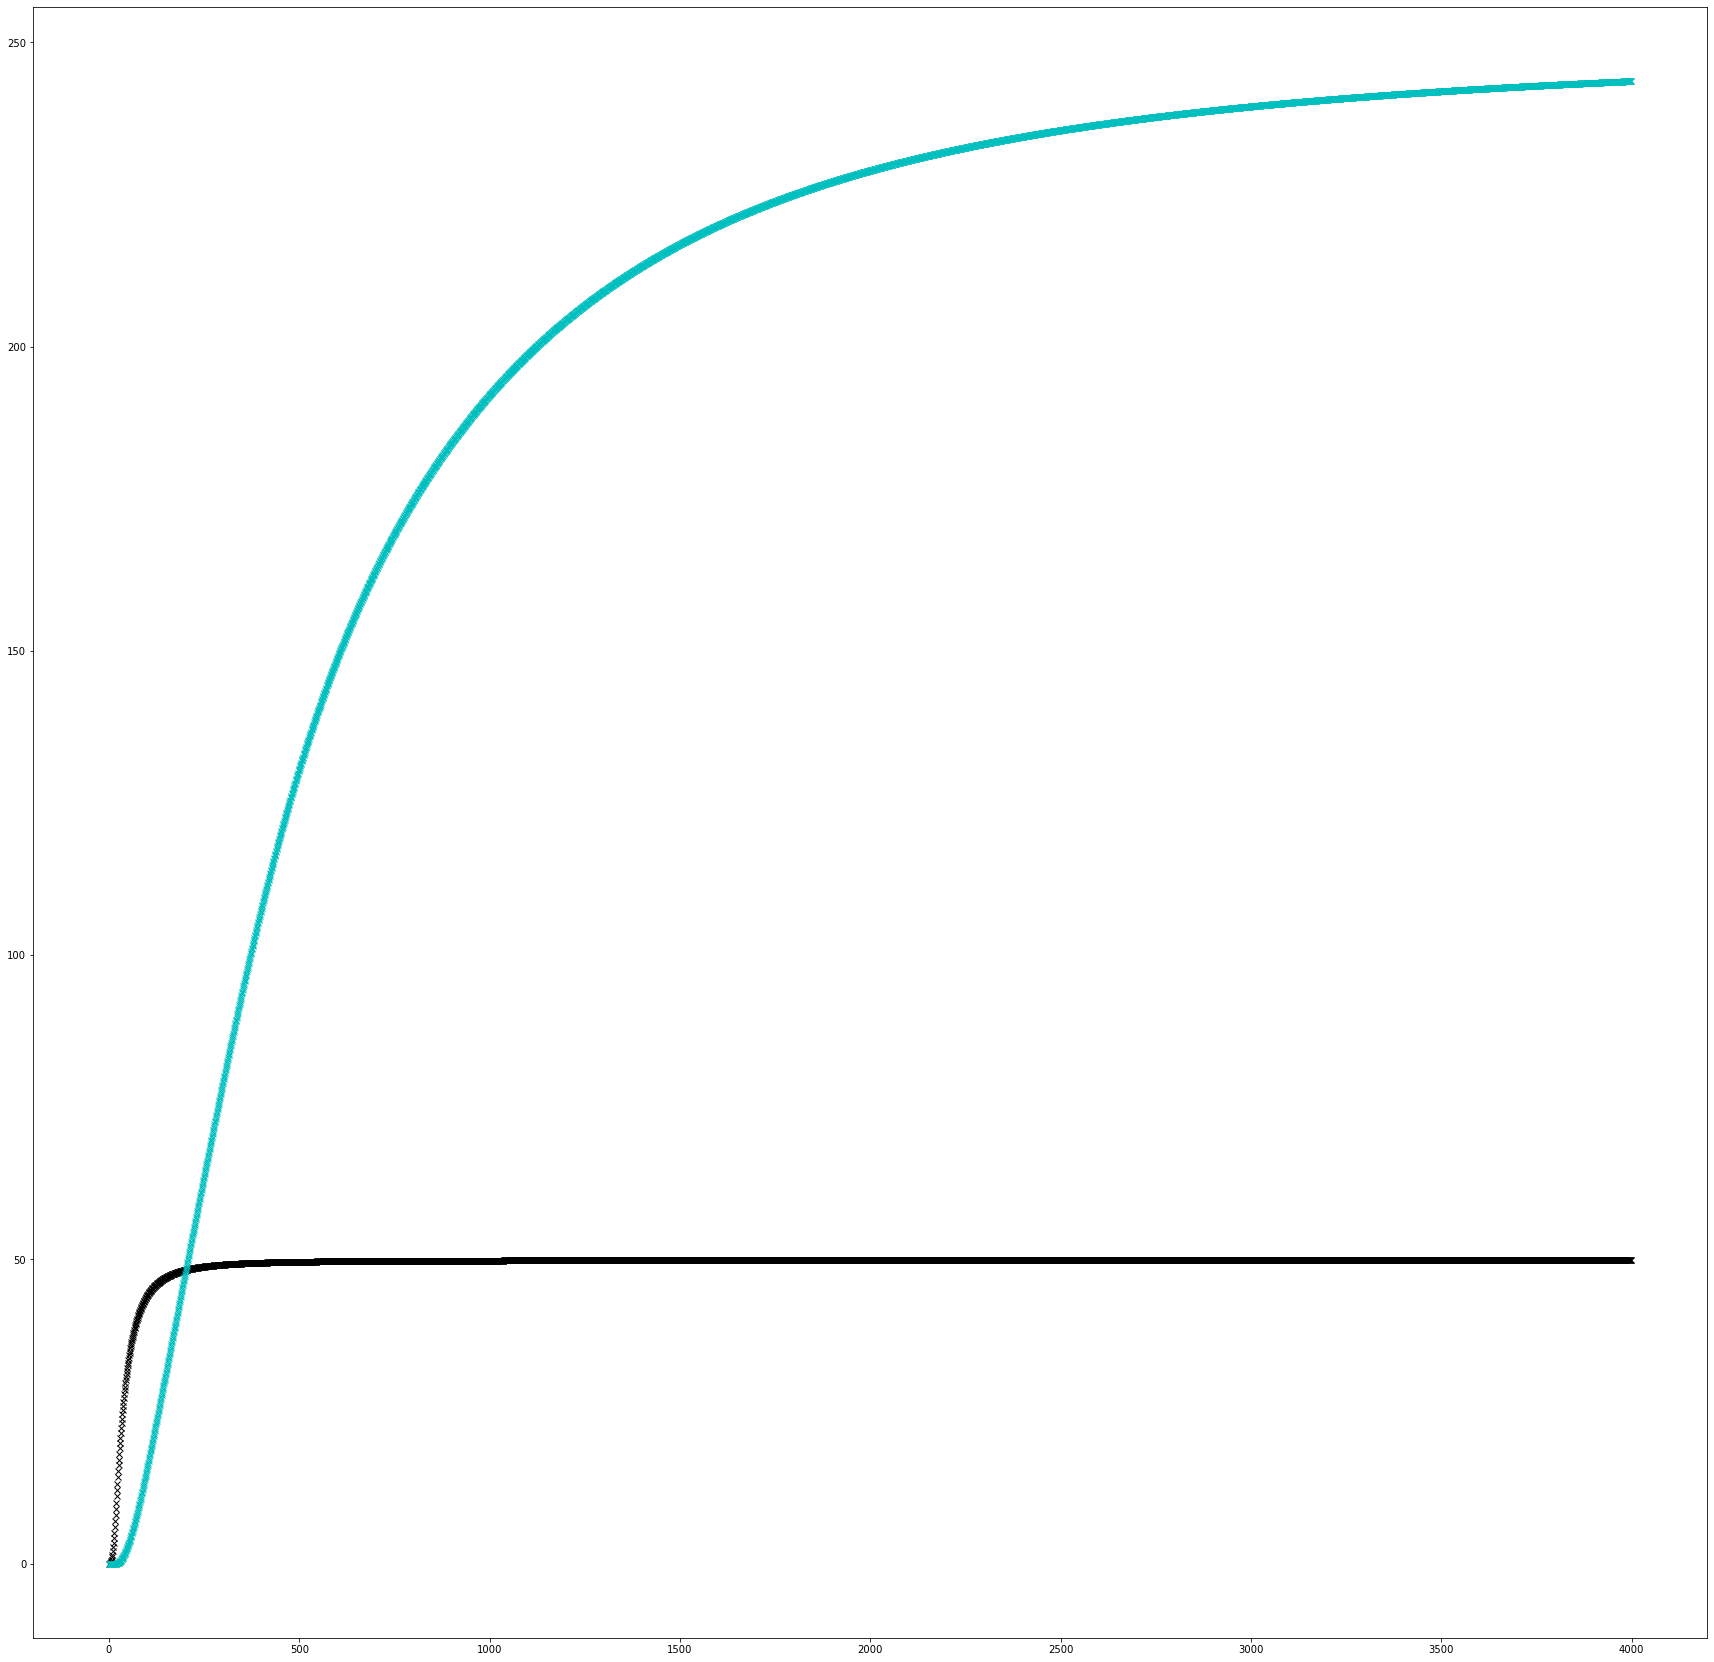

In [16]:
#hf单独计算：141.815 	235.1949	 315.1233	333.9341 351.7837	 419.7602   494.2891	 537.3269	639.4809	 693.9628	751.2563	 831.2246 833.1187	 957.6625	966.6672	 1023.4366	1100.8029	1108.4381	1138.8111 1213.4714	1331.981	 1336.5899	1435.1579	1520.2605	1627.2272	1630.5848 3241.0503	3244.9838	3259.0776	3260.7954
kB=1.380649*10**(-23) #玻尔兹曼常数
h=6.62607015*10**(-34) #普朗克常量
L=6.022*10**23 #阿伏伽德罗常数
V=29979245800
plt.clf()
plt.figure(figsize=(30,30))
for T in range(1,4000):
    Cv=0
    for x in range(0,185):
        K=h*(x+0.5)*V/(kB*T)
        C=L*kB*w[x]*base_num/N*K*K*e**(-K)/((e**(-K)-1)**2)
        Cv=Cv+C
    if (T==298):
        print(Cv)
    plt.plot(T,Cv,color='black',marker='x')
    
for T in range(1,4000):
    Ch=0
    K=h*141.815*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*235.1949*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*315.1233*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*333.9341*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*351.7837*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*419.7602*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*494.2891*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*537.3269*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*639.4808*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*693.9628*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*751.2563*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*831.2246*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*833.1187*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*957.6625*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*966.6672*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1023.4366*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1100.8029*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1108.4381*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1138.8111*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1213.4714*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1331.981*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1336.5899*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1435.1579*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1520.2605*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1627.2272*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1630.5848*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*3241.0503*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*3244.9838*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*3259.0776*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*3260.7954*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    plt.plot(T,Ch,color='c',marker='x')
plt.show()

<Figure size 432x288 with 0 Axes>

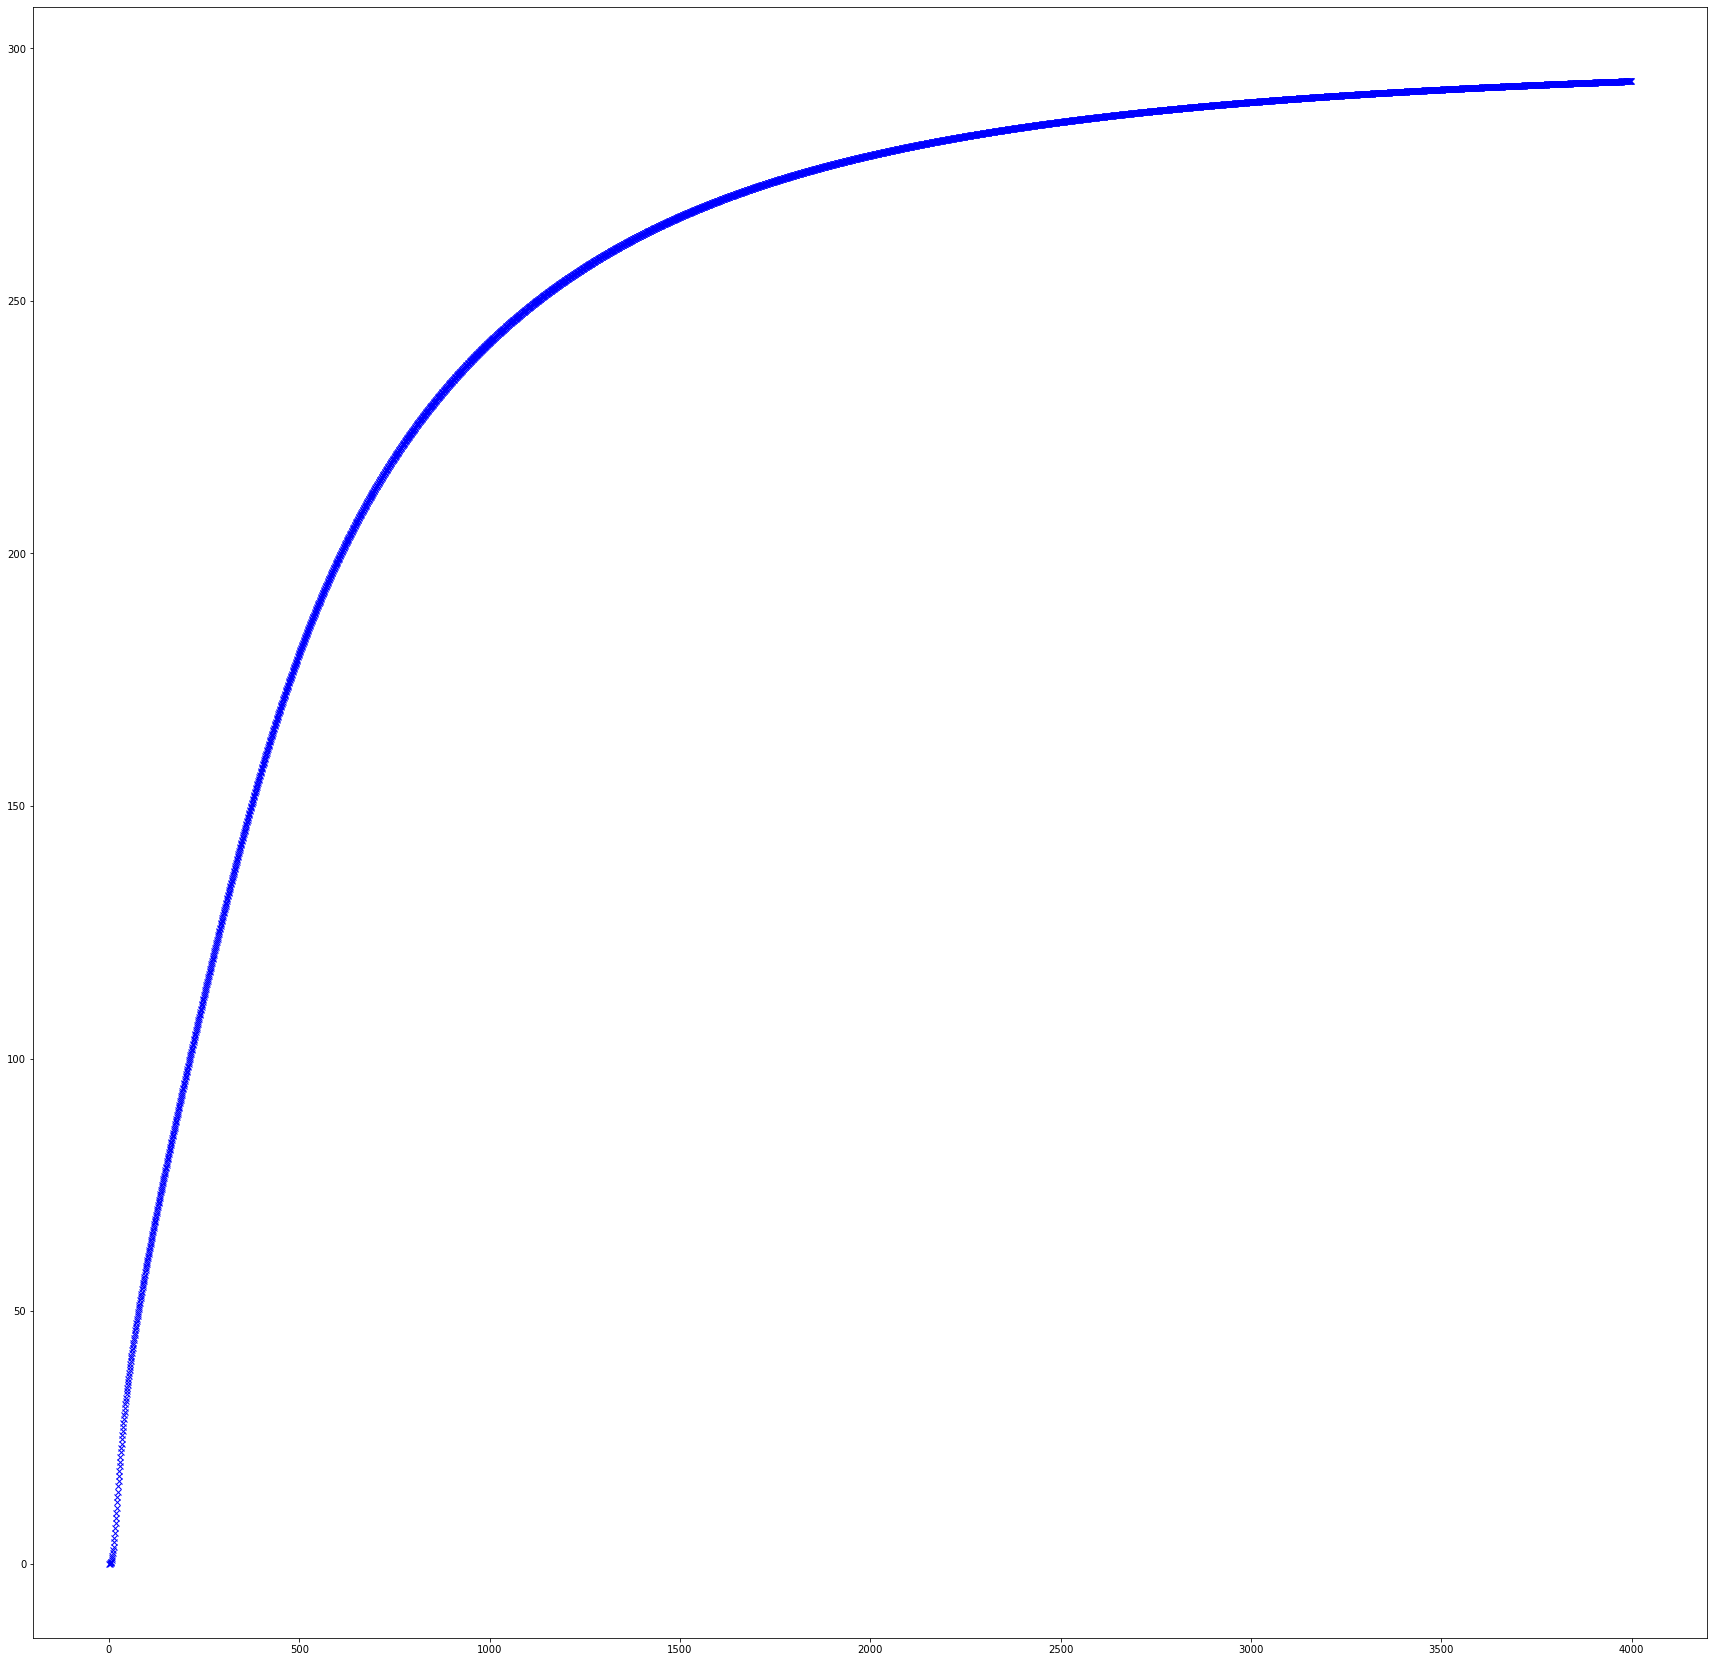

In [17]:
kB=1.380649*10**(-23) #玻尔兹曼常数
h=6.62607015*10**(-34) #普朗克常量
L=6.022*10**23 #阿伏伽德罗常数
V=29979245800
plt.clf()
plt.figure(figsize=(30,30))
for T in range(1,4000):
    Cv=0
    for x in range(0,185):
        K=h*(x+0.5)*V/(kB*T)
        C=L*kB*w[x]*base_num/N*K*K*e**(-K)/((e**(-K)-1)**2)
        Cv=Cv+C
    K=h*141.815*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*235.1949*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*315.1233*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*333.9341*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*351.7837*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*419.7602*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*494.2891*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*537.3269*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*639.4808*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*693.9628*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*751.2563*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*831.2246*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*833.1187*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*957.6625*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*966.6672*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1023.4366*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1100.8029*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1108.4381*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1138.8111*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1213.4714*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1331.981*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1336.5899*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1435.1579*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1520.2605*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1627.2272*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1630.5848*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*3241.0503*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*3244.9838*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*3259.0776*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*3260.7954*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    plt.plot(T,Cv,color='b',marker='x')
plt.show()

<Figure size 432x288 with 0 Axes>

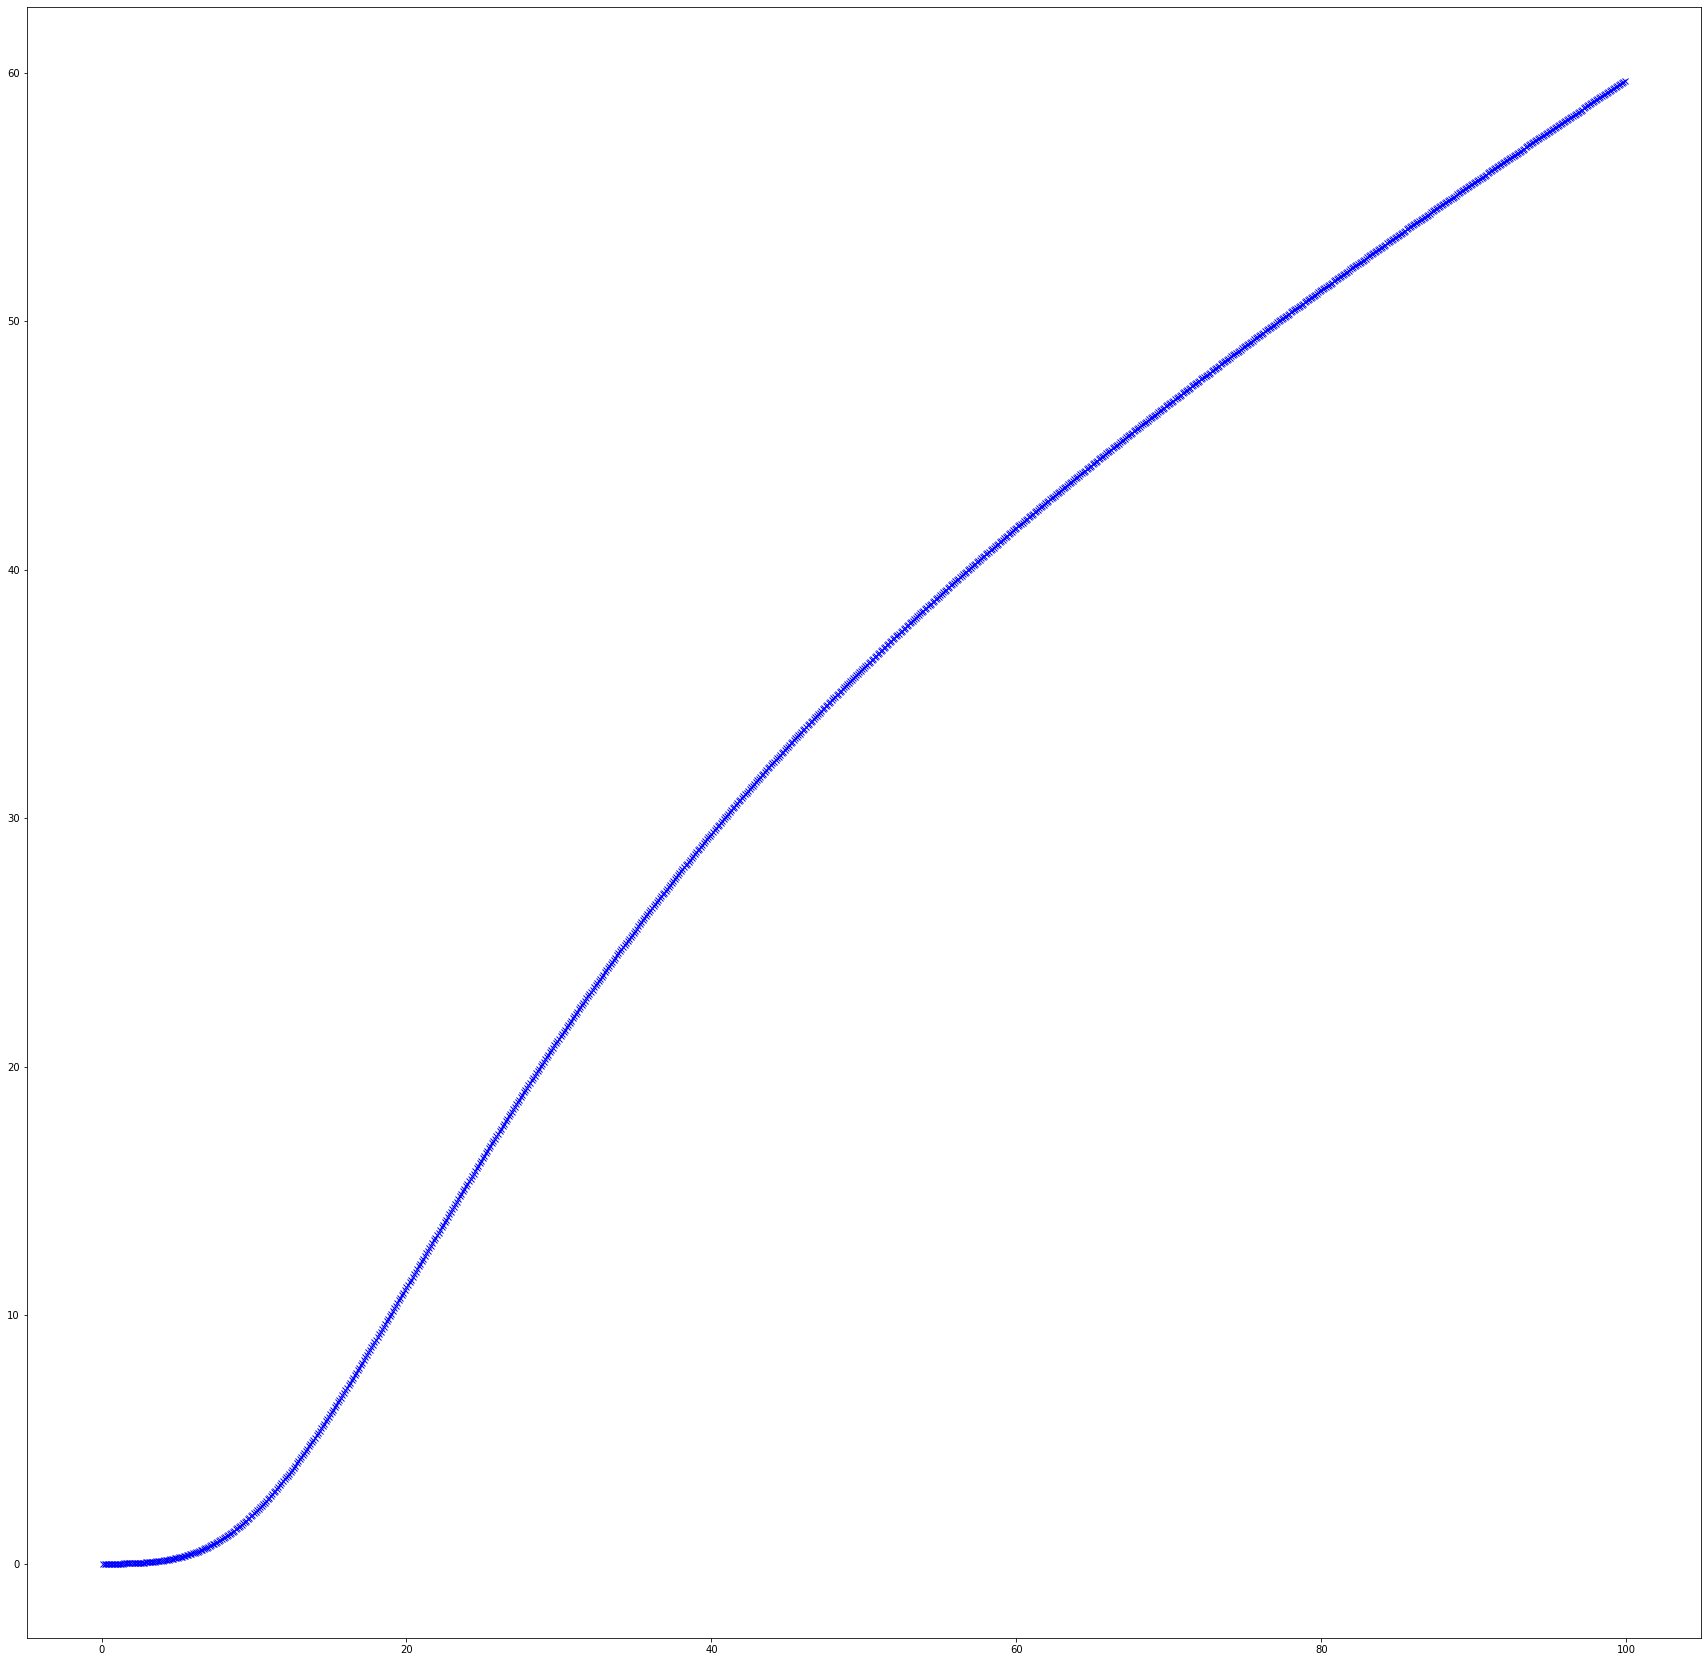

In [18]:
kB=1.380649*10**(-23) #玻尔兹曼常数
h=6.62607015*10**(-34) #普朗克常量
L=6.022*10**23 #阿伏伽德罗常数
V=29979245800
plt.clf()
plt.figure(figsize=(30,30))
for t in range(1,1000):
    Cv=0
    T=t*0.1
    for x in range(0,185):
        K=h*(x+0.5)*V/(kB*T)
        C=L*kB*w[x]*base_num/N*K*K*e**(-K)/((e**(-K)-1)**2)
        Cv=Cv+C
    K=h*141.815*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*235.1949*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*315.1233*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*333.9341*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*351.7837*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*419.7602*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*494.2891*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*537.3269*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*639.4808*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*693.9628*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*751.2563*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*831.2246*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*833.1187*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*957.6625*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*966.6672*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1023.4366*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1100.8029*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1108.4381*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1138.8111*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1213.4714*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1331.981*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1336.5899*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1435.1579*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1520.2605*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1627.2272*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1630.5848*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*3241.0503*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*3244.9838*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*3259.0776*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*3260.7954*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    plt.plot(T,Cv,color='b',marker='x')
plt.show()

49.1315986748873


<Figure size 432x288 with 0 Axes>

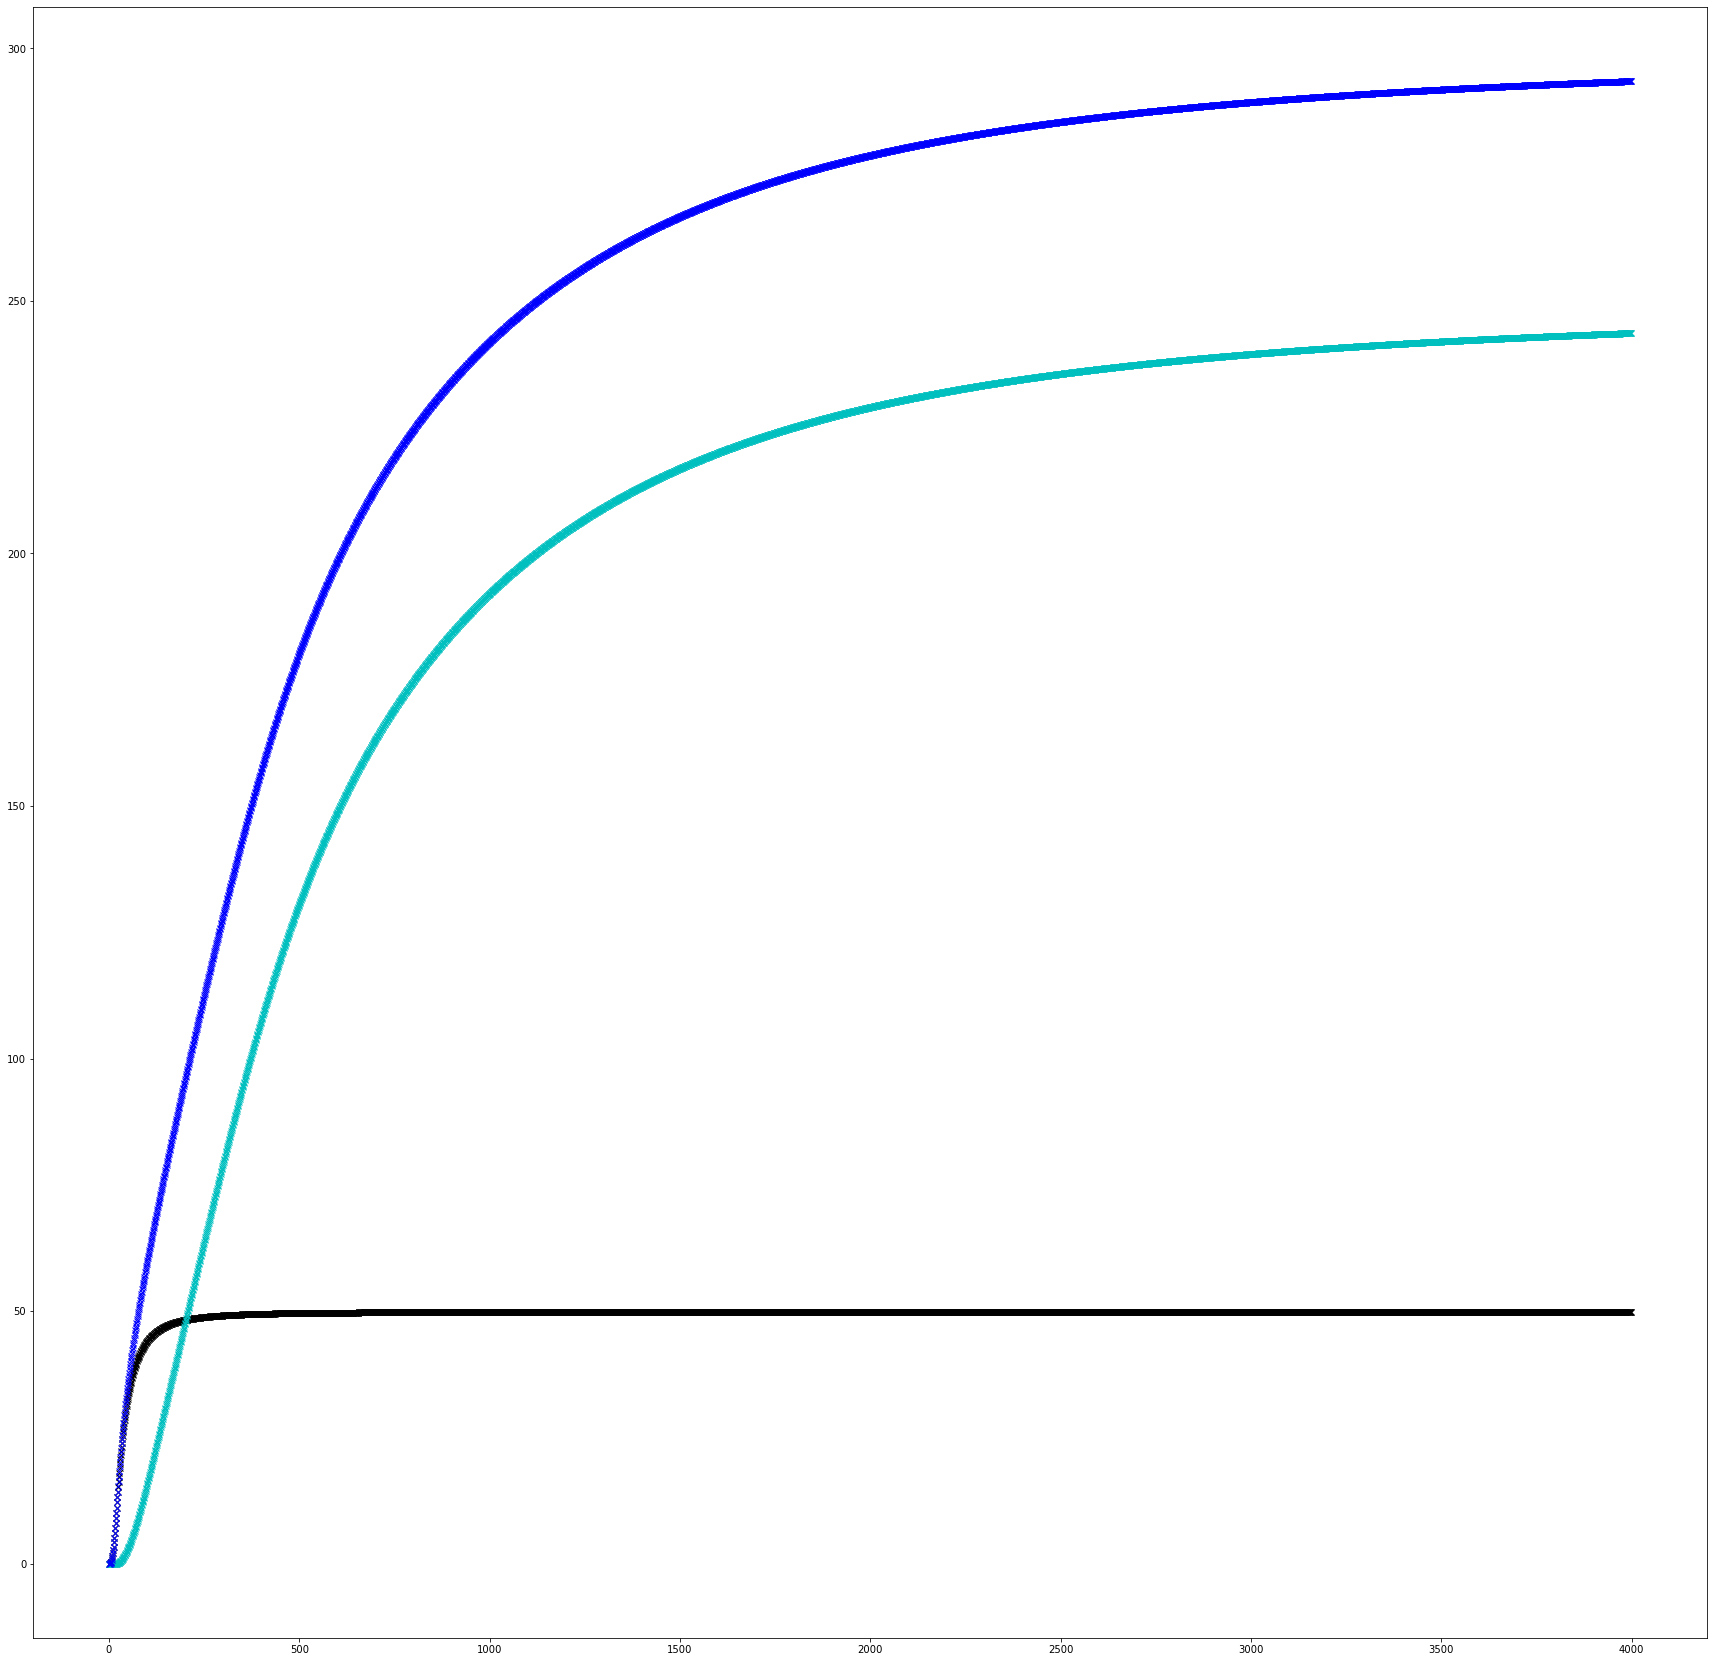

In [19]:
kB=1.380649*10**(-23) #玻尔兹曼常数
h=6.62607015*10**(-34) #普朗克常量
L=6.022*10**23 #阿伏伽德罗常数
V=29979245800
plt.clf()
plt.figure(figsize=(30,30))
for T in range(1,4000):
    Cv=0
    for x in range(0,185):
        K=h*(x+0.5)*V/(kB*T)
        C=L*kB*w[x]*base_num/N*K*K*e**(-K)/((e**(-K)-1)**2)
        Cv=Cv+C
    if (T==298):
        print(Cv)
    plt.plot(T,Cv,color='black',marker='x')
    
for T in range(1,4000):
    Ch=0
    K=h*141.815*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*235.1949*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*315.1233*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*333.9341*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*351.7837*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*419.7602*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*494.2891*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*537.3269*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*639.4808*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*693.9628*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*751.2563*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*831.2246*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*833.1187*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*957.6625*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*966.6672*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1023.4366*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1100.8029*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1108.4381*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1138.8111*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1213.4714*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1331.981*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1336.5899*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1435.1579*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1520.2605*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1627.2272*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1630.5848*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*3241.0503*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*3244.9838*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*3259.0776*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*3260.7954*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    plt.plot(T,Ch,color='c',marker='x')
for T in range(1,4000):
    Cv=0
    for x in range(0,185):
        K=h*(x+0.5)*V/(kB*T)
        C=L*kB*w[x]*base_num/N*K*K*e**(-K)/((e**(-K)-1)**2)
        Cv=Cv+C
    K=h*141.815*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*235.1949*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*315.1233*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*333.9341*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*351.7837*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*419.7602*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*494.2891*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*537.3269*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*639.4808*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*693.9628*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*751.2563*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*831.2246*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*833.1187*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*957.6625*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*966.6672*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1023.4366*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1100.8029*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1108.4381*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1138.8111*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1213.4714*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1331.981*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1336.5899*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1435.1579*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1520.2605*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1627.2272*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1630.5848*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*3241.0503*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*3244.9838*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*3259.0776*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*3260.7954*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    plt.plot(T,Cv,color='b',marker='x')
plt.show()

<Figure size 432x288 with 0 Axes>

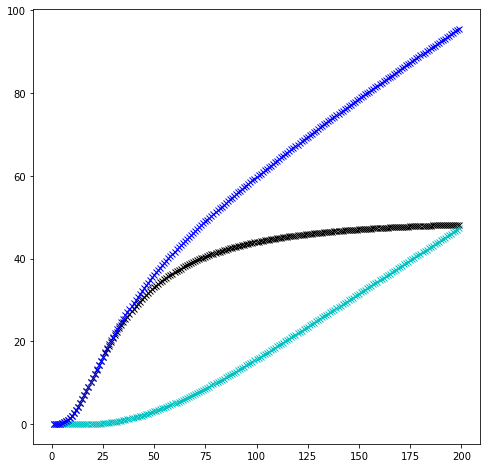

In [23]:
kB=1.380649*10**(-23) #玻尔兹曼常数
h=6.62607015*10**(-34) #普朗克常量
L=6.022*10**23 #阿伏伽德罗常数
V=29979245800
plt.clf()
plt.figure(figsize=(8,8))
for T in range(1,200):
    Cv=0
    for x in range(0,185):
        K=h*(x+0.5)*V/(kB*T)
        C=L*kB*w[x]*base_num/N*K*K*e**(-K)/((e**(-K)-1)**2)
        Cv=Cv+C
    if (T==298):
        print(Cv)
    plt.plot(T,Cv,color='black',marker='x')
    
for T in range(1,200):
    Ch=0
    K=h*141.815*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*235.1949*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*315.1233*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*333.9341*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*351.7837*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*419.7602*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*494.2891*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*537.3269*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*639.4808*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*693.9628*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*751.2563*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*831.2246*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*833.1187*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*957.6625*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*966.6672*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1023.4366*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1100.8029*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1108.4381*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1138.8111*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1213.4714*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1331.981*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1336.5899*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1435.1579*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1520.2605*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1627.2272*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*1630.5848*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*3241.0503*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*3244.9838*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*3259.0776*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    K=h*3260.7954*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Ch=Ch+C
    plt.plot(T,Ch,color='c',marker='x')
for T in range(1,200):
    Cv=0
    for x in range(0,185):
        K=h*(x+0.5)*V/(kB*T)
        C=L*kB*w[x]*base_num/N*K*K*e**(-K)/((e**(-K)-1)**2)
        Cv=Cv+C
    K=h*141.815*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*235.1949*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*315.1233*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*333.9341*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*351.7837*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*419.7602*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*494.2891*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*537.3269*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*639.4808*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*693.9628*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*751.2563*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*831.2246*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*833.1187*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*957.6625*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*966.6672*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1023.4366*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1100.8029*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1108.4381*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1138.8111*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1213.4714*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1331.981*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1336.5899*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1435.1579*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1520.2605*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1627.2272*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*1630.5848*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*3241.0503*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*3244.9838*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*3259.0776*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    K=h*3260.7954*V/(kB*T)
    C=L*kB*K*K*e**(-K)/((e**(-K)-1)**2)
    Cv=Cv+C
    plt.plot(T,Cv,color='b',marker='x')
plt.show()